In [1]:
import sys
import midi_utils
import mido
import pretty_midi
import midi_utils.visualize_utils
import midi_utils.midi_utils
import matplotlib.pyplot as plt
%matplotlib inline


# MIDI_FILE = "examples/MAPS_MUS-mz_545_3_ENSTDkCl.mid"
# MIDI_FILE = "examples/Yamaha_chopin_10_3.mid"
# MIDI_FILE = "examples/SMD_Chopin_Op010-03_007_20100611-SMD.mid"
MIDI_FILE = "examples/Vienna_Chopin_op10_no3_p01.mid"


In [2]:
def tick2time(tick, tempo, ticks_per_beat):
  #  convert midi tick to seconds.
  return tick / ticks_per_beat * tempo / 1e6

print('Midi file: {}\n'.format(MIDI_FILE))

#  -------Parse with mido (Low level)--------
midi_data = mido.MidiFile(MIDI_FILE)
print('parse with MIDO:\n {}\n'.format(midi_data))

print('Length: {}\n'.format(midi_data.length))

print('n_tracks: {:d}\n'.format(len(midi_data.tracks)))


Midi file: examples/Vienna_Chopin_op10_no3_p01.mid

parse with MIDO:
 MidiFile(type=1, ticks_per_beat=4000, tracks=[
  MidiTrack([
    MetaMessage('set_tempo', tempo=500000, time=0),
    MetaMessage('end_of_track', time=0)]),
  MidiTrack([
    Message('note_on', channel=0, note=59, velocity=44, time=39940),
    Message('note_off', channel=0, note=59, velocity=64, time=2200),
    Message('note_on', channel=0, note=40, velocity=22, time=3480),
    Message('note_on', channel=0, note=64, velocity=54, time=10),
    Message('note_on', channel=0, note=56, velocity=26, time=580),
    Message('note_on', channel=0, note=47, velocity=20, time=5250),
    Message('note_on', channel=0, note=59, velocity=37, time=110),
    Message('note_off', channel=0, note=56, velocity=64, time=260),
    Message('note_off', channel=0, note=64, velocity=64, time=3450),
    Message('note_on', channel=0, note=63, velocity=52, time=500),
    Message('note_off', channel=0, note=47, velocity=64, time=0),
    Message('not

In [3]:
print('Messages(events) in first track:')
for idx, msg in enumerate(midi_data.tracks[0]):
  print('{:d}: {}'.format(idx, msg))

print('\nMessages(events) in second track (first 10)')
for idx, msg in enumerate(midi_data.tracks[1]):
  if idx > 10:
    break
  print('{:d}: {}'.format(idx, msg))


Messages(events) in first track:
0: MetaMessage('set_tempo', tempo=500000, time=0)
1: MetaMessage('end_of_track', time=0)

Messages(events) in second track (first 10)
0: note_on channel=0 note=59 velocity=44 time=39940
1: note_off channel=0 note=59 velocity=64 time=2200
2: note_on channel=0 note=40 velocity=22 time=3480
3: note_on channel=0 note=64 velocity=54 time=10
4: note_on channel=0 note=56 velocity=26 time=580
5: note_on channel=0 note=47 velocity=20 time=5250
6: note_on channel=0 note=59 velocity=37 time=110
7: note_off channel=0 note=56 velocity=64 time=260
8: note_off channel=0 note=64 velocity=64 time=3450
9: note_on channel=0 note=63 velocity=52 time=500
10: note_off channel=0 note=47 velocity=64 time=0


In [4]:
print('\nConvert event time in second track into time(sec)')

try:
  tempo = midi_data.tracks[0][0].tempo  # there can be multiple tempo messages, in different position
except:
  tempo = 5e5  # default value
ticks_per_beat = midi_data.ticks_per_beat

print('Tempo: {:d}, Ticks_per_beats: {:d}. 1000 ticks ~= {:0.4f} seconds\n'.
      format(tempo, ticks_per_beat, tick2time(1000, tempo, ticks_per_beat)))

time_in_sec = 0
for idx, msg in enumerate(midi_data.tracks[1]):
  if idx > 10:
    break
  time_in_sec += tick2time(msg.time, tempo, ticks_per_beat)
  print('{:d}: {}, sec: {:0.4f}'.format(idx, msg, time_in_sec))



Convert event time in second track into time(sec)
Tempo: 500000, Ticks_per_beats: 4000. 1000 ticks ~= 0.1250 seconds

0: note_on channel=0 note=59 velocity=44 time=39940, sec: 4.9925
1: note_off channel=0 note=59 velocity=64 time=2200, sec: 5.2675
2: note_on channel=0 note=40 velocity=22 time=3480, sec: 5.7025
3: note_on channel=0 note=64 velocity=54 time=10, sec: 5.7037
4: note_on channel=0 note=56 velocity=26 time=580, sec: 5.7762
5: note_on channel=0 note=47 velocity=20 time=5250, sec: 6.4325
6: note_on channel=0 note=59 velocity=37 time=110, sec: 6.4462
7: note_off channel=0 note=56 velocity=64 time=260, sec: 6.4787
8: note_off channel=0 note=64 velocity=64 time=3450, sec: 6.9100
9: note_on channel=0 note=63 velocity=52 time=500, sec: 6.9725
10: note_off channel=0 note=47 velocity=64 time=0, sec: 6.9725


In [5]:
#  -------Parse with pretty_midi (high level)--------
midi_data = pretty_midi.PrettyMIDI(MIDI_FILE)
print('parse with Pretty_midi:\n {}\n'.format(midi_data))

print('Length: {}'.format(midi_data.get_end_time()))
print('Length difference comes from omitting End of Tracks message\n')

print('n_tracks: {:d}'.format(len(midi_data.instruments)))
print('Pretty midi merges events from multiple tracks. checkout the docs for details\n')


parse with Pretty_midi:

Length: 88.22500000000001
Length difference comes from omitting End of Tracks message

n_tracks: 1
Pretty midi merges events from multiple tracks. checkout the docs for details



In [6]:
print('Notes in first instruments:')
for idx, msg in enumerate(midi_data.instruments[0].notes):
  if idx > 10:
    break
  print('{:d}: {}'.format(idx, msg))


Notes in first instruments:
0: Note(start=4.992500, end=5.267500, pitch=59, velocity=44)
1: Note(start=5.776250, end=6.478750, pitch=56, velocity=26)
2: Note(start=5.703750, end=6.910000, pitch=64, velocity=54)
3: Note(start=6.432500, end=6.972500, pitch=47, velocity=20)
4: Note(start=6.446250, end=7.071250, pitch=59, velocity=37)
5: Note(start=7.012500, end=7.322500, pitch=56, velocity=32)
6: Note(start=6.972500, end=7.526250, pitch=63, velocity=52)
7: Note(start=5.702500, end=7.548750, pitch=40, velocity=22)
8: Note(start=7.502500, end=8.065000, pitch=59, velocity=41)
9: Note(start=7.518750, end=8.075000, pitch=47, velocity=26)
10: Note(start=7.476250, end=8.112500, pitch=64, velocity=59)


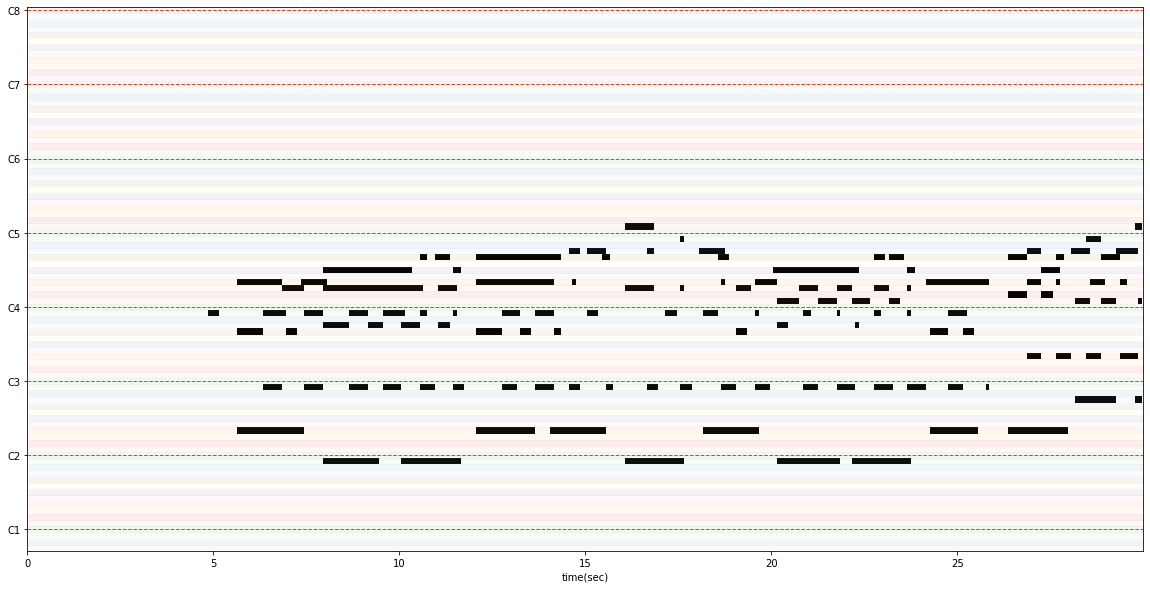

In [8]:
#  -------Draw piano roll------

fps = 10
piano_roll = midi_utils.midi_utils.mid2piano_roll(MIDI_FILE, fps=fps)
plt.figure(figsize=(20, 10))
midi_utils.visualize_utils.draw_piano_roll(piano_roll, draw_range=[0, 300], fps=fps)
